In [2]:
hitters <- read.csv("csv/Hitters.csv")
str(hitters)

hitters <- na.omit(hitters)
hitters <- hitters[,2:21]

'data.frame':	322 obs. of  21 variables:
 $ X        : Factor w/ 322 levels "-Alan Ashby",..: 12 1 7 8 9 5 6 14 10 11 ...
 $ AtBat    : int  293 315 479 496 321 594 185 298 323 401 ...
 $ Hits     : int  66 81 130 141 87 169 37 73 81 92 ...
 $ HmRun    : int  1 7 18 20 10 4 1 0 6 17 ...
 $ Runs     : int  30 24 66 65 39 74 23 24 26 49 ...
 $ RBI      : int  29 38 72 78 42 51 8 24 32 66 ...
 $ Walks    : int  14 39 76 37 30 35 21 7 8 65 ...
 $ Years    : int  1 14 3 11 2 11 2 3 2 13 ...
 $ CAtBat   : int  293 3449 1624 5628 396 4408 214 509 341 5206 ...
 $ CHits    : int  66 835 457 1575 101 1133 42 108 86 1332 ...
 $ CHmRun   : int  1 69 63 225 12 19 1 0 6 253 ...
 $ CRuns    : int  30 321 224 828 48 501 30 41 32 784 ...
 $ CRBI     : int  29 414 266 838 46 336 9 37 34 890 ...
 $ CWalks   : int  14 375 263 354 33 194 24 12 8 866 ...
 $ League   : Factor w/ 2 levels "A","N": 1 2 1 2 2 1 2 1 2 1 ...
 $ Division : Factor w/ 2 levels "E","W": 1 2 2 1 1 2 1 2 2 1 ...
 $ PutOuts  : int  446 

In [3]:
library(leaps)
str(hitters)

model1 <- regsubsets(Salary~., data=hitters)
summary(model1)

'data.frame':	263 obs. of  20 variables:
 $ AtBat    : int  315 479 496 321 594 185 298 323 401 574 ...
 $ Hits     : int  81 130 141 87 169 37 73 81 92 159 ...
 $ HmRun    : int  7 18 20 10 4 1 0 6 17 21 ...
 $ Runs     : int  24 66 65 39 74 23 24 26 49 107 ...
 $ RBI      : int  38 72 78 42 51 8 24 32 66 75 ...
 $ Walks    : int  39 76 37 30 35 21 7 8 65 59 ...
 $ Years    : int  14 3 11 2 11 2 3 2 13 10 ...
 $ CAtBat   : int  3449 1624 5628 396 4408 214 509 341 5206 4631 ...
 $ CHits    : int  835 457 1575 101 1133 42 108 86 1332 1300 ...
 $ CHmRun   : int  69 63 225 12 19 1 0 6 253 90 ...
 $ CRuns    : int  321 224 828 48 501 30 41 32 784 702 ...
 $ CRBI     : int  414 266 838 46 336 9 37 34 890 504 ...
 $ CWalks   : int  375 263 354 33 194 24 12 8 866 488 ...
 $ League   : Factor w/ 2 levels "A","N": 2 1 2 2 1 2 1 2 1 1 ...
 $ Division : Factor w/ 2 levels "E","W": 2 2 1 1 2 1 2 2 1 1 ...
 $ PutOuts  : int  632 880 200 805 282 76 121 143 0 238 ...
 $ Assists  : int  43 82 11 40 42

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " "

In [4]:
model1 <- regsubsets(Salary~., data=hitters, nvmax=19)
model2 <- regsubsets(Salary~., data=hitters)
summary(model2)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " "

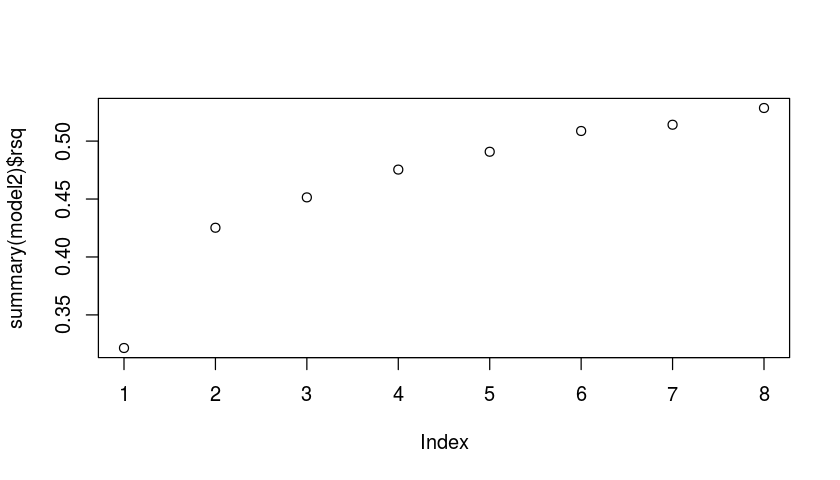

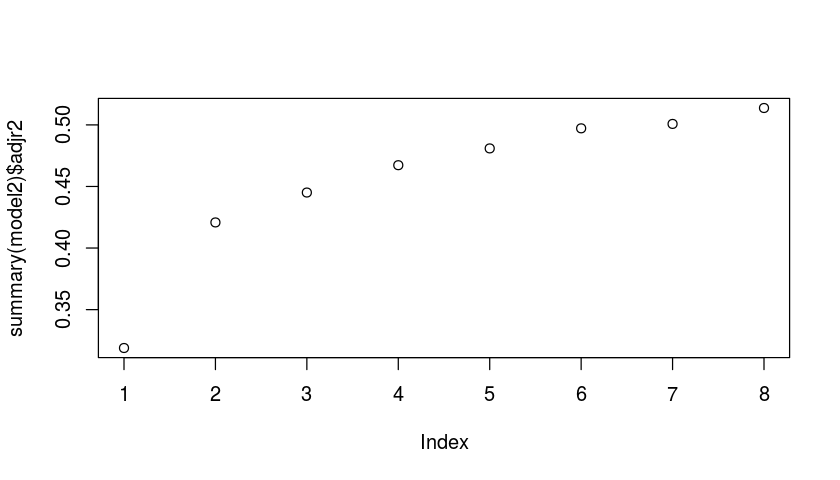

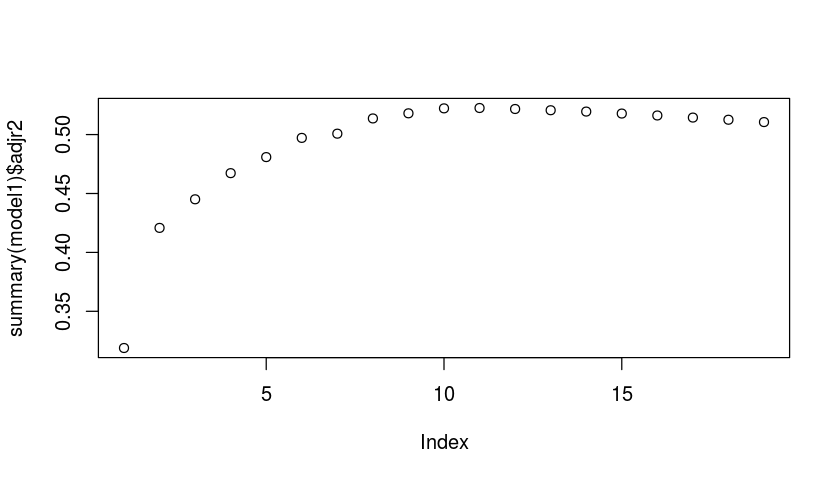

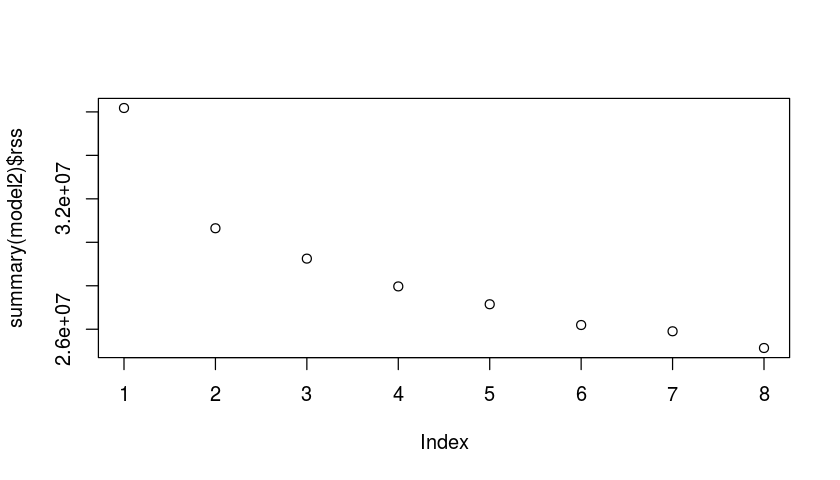

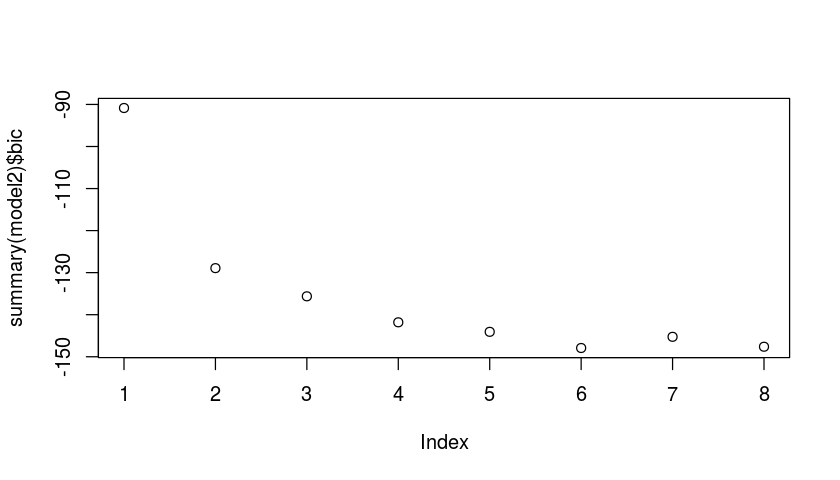

In [5]:
options(repr.plot.width=7, repr.plot.height=4) # resize IRkernel plot size

plot(summary(model2)$rsq)
plot(summary(model2)$adjr2)
plot(summary(model1)$adjr2)
plot(summary(model2)$rss)
plot(summary(model2)$bic)

### Setup and init run of modelLasso

In [13]:
library(glmnet)

# glmnet input config
x <- model.matrix(Salary~., data=hitters)
y <- hitters$Salary
grid <- 10^(seq(10, -2, length=100))

# training/test set
set.seed(1)
train <- sample(1:nrow(x), nrow(x)/2)
test <- -train

# run glmnet
modelLasso <- glmnet(x[train,], y[train], lambda=grid)
summary(modelLasso)

          Length Class     Mode   
a0         100   -none-    numeric
beta      2000   dgCMatrix S4     
df         100   -none-    numeric
dim          2   -none-    numeric
lambda     100   -none-    numeric
dev.ratio  100   -none-    numeric
nulldev      1   -none-    numeric
npasses      1   -none-    numeric
jerr         1   -none-    numeric
offset       1   -none-    logical
call         4   -none-    call   
nobs         1   -none-    numeric

### Extract model coefficients

   [[ suppressing 100 column names ‘s0’, ‘s1’, ‘s2’ ... ]]


20 x 100 sparse Matrix of class "dgCMatrix"
                                                                               
(Intercept) . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AtBat       . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Hits        . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
HmRun       . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Runs        . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
RBI         . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Walks       . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Years       . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
CAtBat      . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
CHits       . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
CHmRun      . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

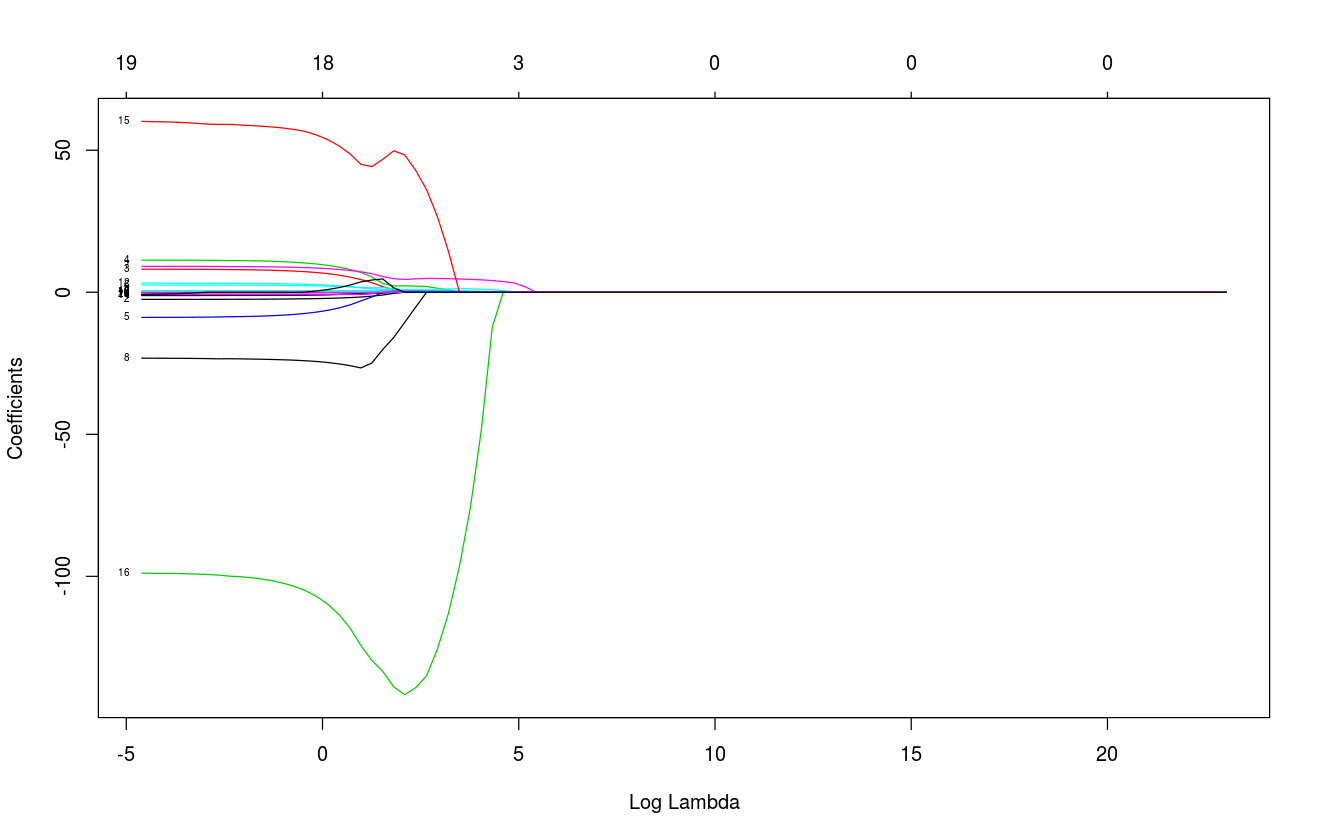

In [80]:
# model coeffs
modelLasso$beta # col names correspond to the lambda values
# modelLasso$df
# coefficients(modelLasso)

# plot lambda
plot(modelLasso, xvar="lambda", label=T)

### Predicting LASSO model SSE

In [24]:
# s = lambda = 100
predictLasso1 <- predict(modelLasso, newx=x[test,], s=100)
mean((predictLasso1-y[test])^2)

# s = lambda = 200
predictLasso1 <- predict(modelLasso, newx=x[test,], s=200)
mean((predictLasso1-y[test])^2)

# s = lambda = 100 EXACT
predictLasso1 <- predict(modelLasso, newx=x[test,], s=100, exact=T)
mean((predictLasso1-y[test])^2)

# s = lambda = 200 EXACT
predictLasso1 <- predict(modelLasso, newx=x[test,], s=200, exact=T)
mean((predictLasso1-y[test])^2)

?predict.glmnet

[1] 126478.1

[1] 177294.7

[1] 126478.1

[1] 181097.2

### k-fold cross validation (default k=10)

In [54]:
# ?cv.glmnet

# replicate 1000 times
x <- replicate(1000, {
    # set.seed(2)
    cvLasso1 <- cv.glmnet(x[train,], y[train])
    # cvLasso1$glmnet.fit
    cvLasso1$lambda.min

    # plot cross validation curve
    # cvm = mean cross-validated error - a vector of length `length(lambda)`
    # i.e. estimate of error out-of-sample
#     plot(cvLasso1$lambda, cvLasso1$cvm)

    # for seed(2), optimal lambda = 22.18
    # find SSE of model with optimal lambda
    predictLasso2 <- predict(modelLasso, newx=x[test,], s=cvLasso1$lambda.min, exact=T)
    mean((predictLasso2-y[test])^2)
#     cvLasso1$lambda.min
  })
hist(x)

# results <- numeric()
# cross_validate <- function(x) {
#     # set.seed(2)
#     cvLasso1 <- cv.glmnet(x[train,], y[train])
#     # cvLasso1$glmnet.fit
#     cvLasso1$lambda.min

#     # plot cross validation curve
#     # cvm = mean cross-validated error - a vector of length `length(lambda)`
#     # i.e. estimate of error out-of-sample
#     plot(cvLasso1$lambda, cvLasso1$cvm)

#     # for seed(2), optimal lambda = 22.18
#     # find SSE of model with optimal lambda
#     predictLasso2 <- predict(modelLasso, newx=x[test,], s=cvLasso1$lambda.min, eact=T)
#     avg <- mean((predictLasso2-y[test])^2)
#     return(avg)
# #     coef(modelLasso, s=cvLasso1$lambda.min, exact=T)
# }

# for (year in c(2010,2011,2012,2013,2014,2015)){
#   print(paste("The year is", year))
# }


# # set.seed(2)
# cvLasso1 <- cv.glmnet(x[train,], y[train])
# # cvLasso1$glmnet.fit
# cvLasso1$lambda.min

# # plot cross validation curve
# # cvm = mean cross-validated error - a vector of length `length(lambda)`
# # i.e. estimate of error out-of-sample
# plot(cvLasso1$lambda, cvLasso1$cvm)

# # for seed(2), optimal lambda = 22.18
# # find SSE of model with optimal lambda
# predictLasso2 <- predict(modelLasso, newx=x[test,], s=cvLasso1$lambda.min, eact=T)
# mean((predictLasso2-y[test])^2)
# coef(modelLasso, s=cvLasso1$lambda.min, exact=T)

# if we change the seed, we obtain different optimal lambda values for the k-fold validation
# possible to bootstrap to obtain normal dist. of lambda values (regardless of seed random algo)

ERROR: Error in x[train, ]: incorrect number of dimensions


### Cross-country growth regression

In [58]:
eg <- read.csv("csv/economicgrowth.csv")
str(eg)

eg <- subset(eg, select=-c(Country))

'data.frame':	72 obs. of  43 variables:
 $ Country    : Factor w/ 72 levels "AR","AT","AU",..: 19 1 3 2 4 5 7 6 12 8 ...
 $ y          : num  0.01369 0.00642 0.0189 0.02922 0.02857 ...
 $ Abslat     : num  36.7 36.7 32.2 48.2 50.8 ...
 $ Spanish    : int  0 1 0 0 0 1 0 0 0 0 ...
 $ French     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ Brit       : int  0 0 1 0 0 0 1 0 0 1 ...
 $ WarDummy   : int  0 1 0 0 0 0 0 0 0 0 ...
 $ LatAmerica : int  0 1 0 0 0 1 0 1 0 0 ...
 $ SubSahara  : int  0 0 0 0 0 0 1 0 1 0 ...
 $ OutwarOr   : int  1 0 0 0 1 0 0 0 1 1 ...
 $ Area       : int  2382 2767 7687 84 31 1099 582 8512 475 9976 ...
 $ PrScEnroll : num  0.46 0.98 1 1 1 0.64 0.42 0.95 0.65 1 ...
 $ LifeExp    : num  47.3 65.2 70.7 68.8 69.7 42.8 45.7 54.9 43.4 71.1 ...
 $ GDP60      : num  7.44 8.1 8.97 8.55 8.62 ...
 $ Mining     : num  0.196 0.023 0.038 0.004 0 0.075 0.533 0.017 0.088 0.034 ...
 $ EcoOrg     : int  0 5 5 4 5 3 5 3 5 5 ...
 $ YrsOpen    : num  0 0.089 0.689 0.778 0.778 0.733 0.356 0.089 0.1

### Warning! Long computation time

In [61]:
library(leaps)

# there are a total of 2^(41) possible regressions to run!
modelCCR <- regsubsets(y~., data=eg, nvmax=41)

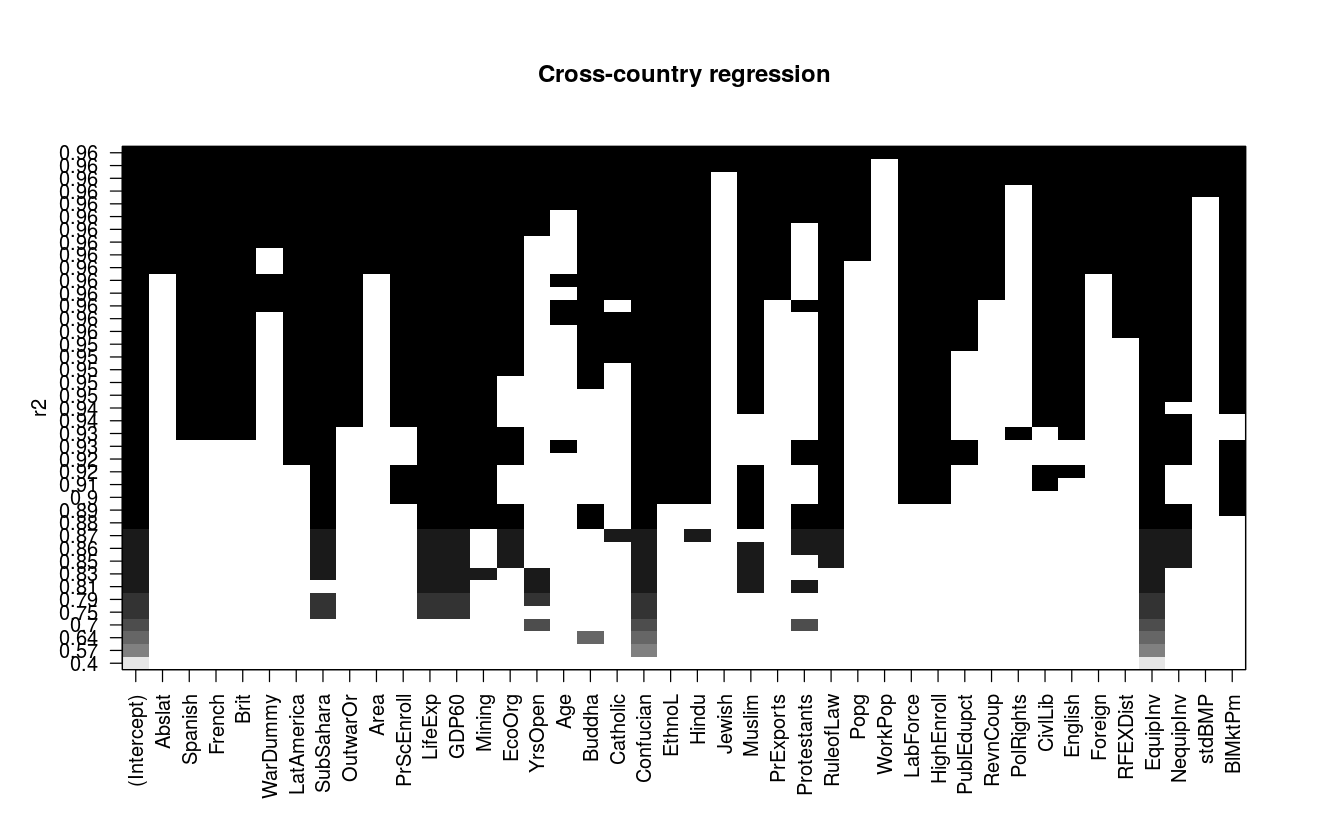

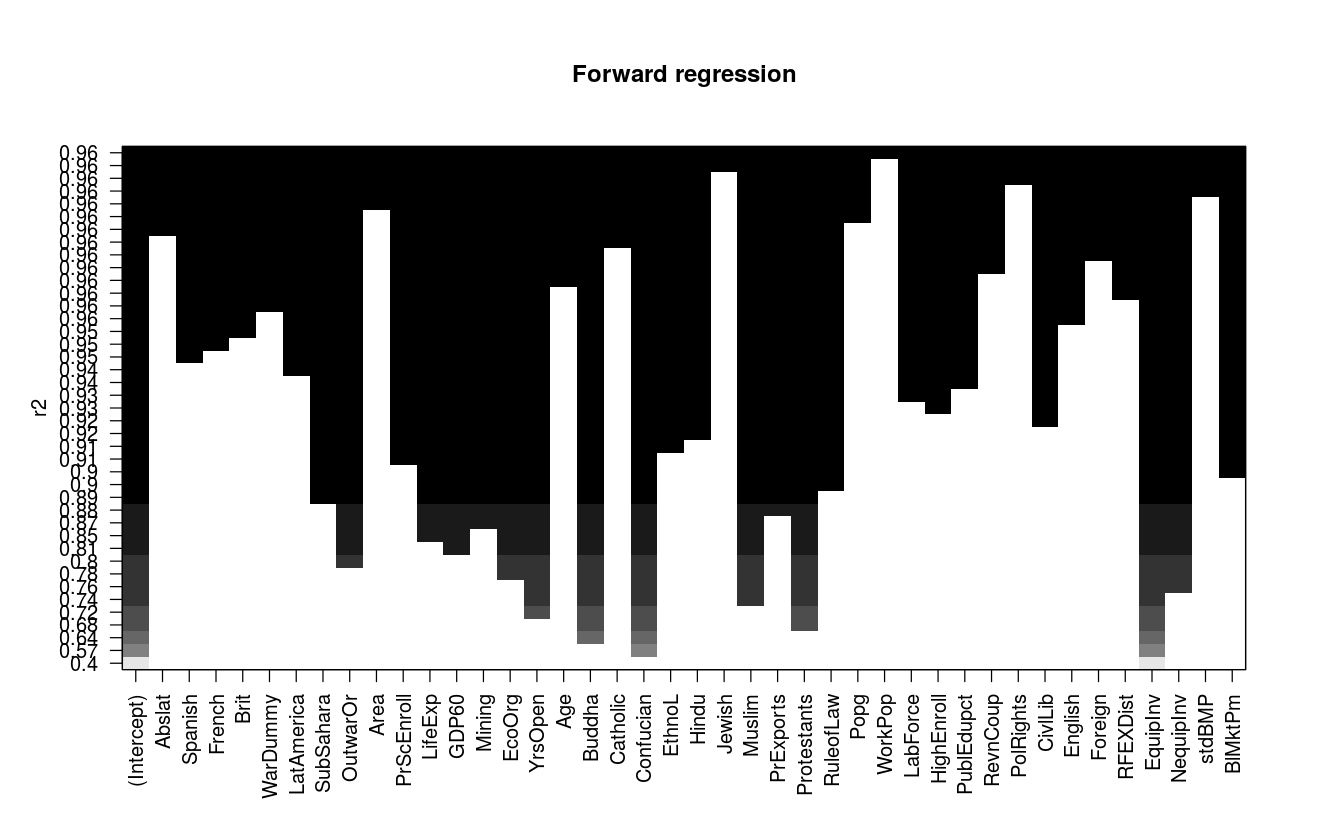

In [73]:
options(repr.plot.width=11, repr.plot.height=7) # resize IRkernel plot size

# plot(summary(model1)$rsq)
# plot(summary(model1)$adjr2)

# this will give us an idea for which variables are more robust (important) and are not as easy to kick out whenever
#... you shift from k variables to k+1 variables, hence the non-contiguous blocks
plot(model1, scale=c("r2"), main="Cross-country regression")

modelSR <- regsubsets(y~., data=eg, nvmax=41, method="forward")
plot(modelSR, scale=c("r2"), main="Forward regression")

### Running LASSO on economicgrowth.csv

[1]  0  1  2  3  3  3  3  4  4  4  4  5  5  7  7  9 10 10 11 12 13 13 14 15 17
[26] 19 20 20 21 23 24 24 26 26 26 26 27 28 29 30 30 30 30 32 32 34 35 35 35 34
[51] 35 35 35 37 37 36 36 36 36 36 36 36 36 38 40 41 41 41 41 41 41 41 41 41 41
[76] 41 41 40 40 40 40 40 40 40 40 40

   [[ suppressing 86 column names ‘s0’, ‘s1’, ‘s2’ ... ]]


41 x 86 sparse Matrix of class "lgCMatrix"
                                                                               
Abslat      . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Spanish     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
French      . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Brit        . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
WarDummy    . . . . . . . . . . . . . . . . . . . . . . . . . . . . . | | | | |
LatAmerica  . . . . . . . . . . . . . . . . . . . | | | | | | | | | | | | | | |
SubSahara   . . . . . . . . . . . | | | | | | | | | | | | | | | | | | | | | | |
OutwarOr    . . . . . . . . . . . . . . . . . . . . . . . . . . | | | | | | | |
Area        . . . . . . . . . . . . . . . . . . . . . . | | | | | | | | | | | |
PrScEnroll  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
LifeExp     . . . . . . . . . . . . . . . . . . . . . . . . . | | | | | | | |

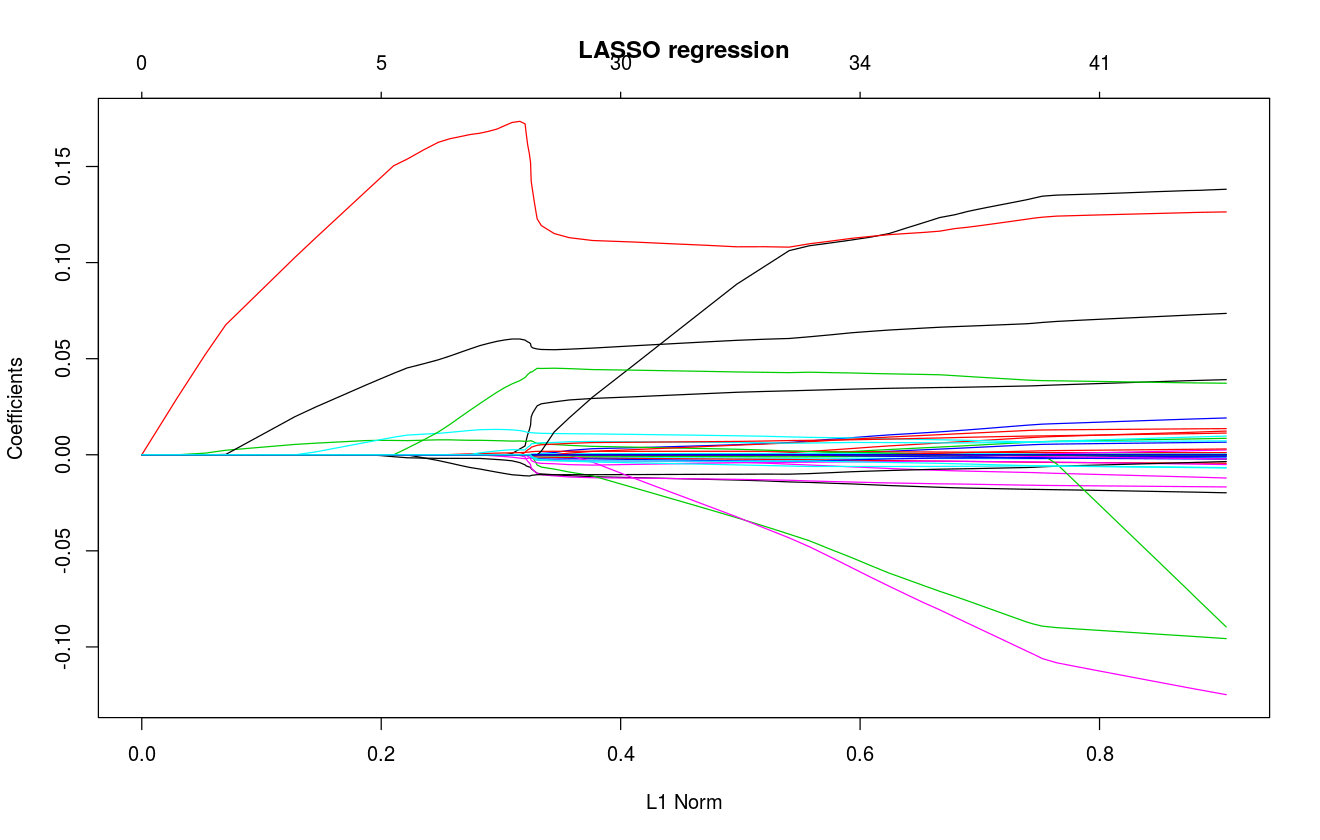

In [79]:
library(glmnet)
xeg <- as.matrix(eg[,2:42])
modelLASSOeg <- glmnet(xeg, eg$y) # uses default lambda range

# checking coefficients
modelLASSOeg$df # tells us how many nonzero `beta` coefficients there are, for each lambda
modelLASSOeg$beta != 0 # can use plot(model, scale=c("r2"), main="Forward regression")
plot(modelLASSOeg, main="LASSO regression")